# READ DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

## Dataframe

In [22]:
file_name = "cleaned_supermarket_customer(4).csv"
Cdata = pd.read_csv(file_name, parse_dates=['Dt_Customer'])
Cdata

,ID,Age,Education,Household_Member,Income,Income_Class,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,RFM_Score,Membership,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotAcceptedCmp,Complain
0,5524,57,Graduation,1,58138.0,Medium,2012-09-04,635,88,546,...,11,Bronze Member,3,0,0,0,0,0,0,0
1,2174,60,Graduation,3,46344.0,Medium,2014-03-08,11,1,6,...,4,Platinum Member,2,0,0,0,0,0,0,0
2,4141,49,Graduation,2,71613.0,Medium,2013-08-21,426,49,127,...,9,Silver Member,1,0,0,0,0,0,0,0
3,6182,30,Graduation,3,26646.0,Low,2014-02-10,11,4,20,...,4,Platinum Member,2,0,0,0,0,0,0,0
4,5324,33,PhD,3,58293.0,Medium,2014-01-19,173,43,118,...,10,Bronze Member,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,10870,47,Graduation,3,61223.0,Medium,2013-06-13,709,43,182,...,9,Silver Member,2,0,0,0,0,0,0,0
2201,4001,68,PhD,5,64014.0,Medium,2014-06-10,406,0,30,...,9,Silver Member,7,1,0,0,0,0,1,0
2202,7270,33,Graduation,1,56981.0,Medium,2014-01-25,908,48,217,...,11,Bronze Member,1,0,0,0,1,0,1,0
2203,8235,58,Master,3,69245.0,Medium,2014-01-24,428,30,214,...,8,Silver Member,2,0,0,0,0,0,0,0


### summary

In [18]:
Cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Age                  2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Household_Member     2205 non-null   int64         
 4   Income               2205 non-null   float64       
 5   Income_Class         2205 non-null   object        
 6   Dt_Customer          2205 non-null   datetime64[ns]
 7   MntWines             2205 non-null   int64         
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   int64         
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   int64         
 13  M_ProductPurchase    2205 non-nul

In [20]:
Cdata.isna().sum()

ID                     0
Age                    0
Education              0
Household_Member       0
Income                 0
Income_Class           0
Dt_Customer            0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
M_ProductPurchase      0
Mq_Ranks               0
R_LastPurchase         0
Rq_Ranks               0
NumWebVisitsMonth      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
F_PlacePurchase        0
Fq_Ranks               0
RFM_Score              0
Membership             0
NumDealsPurchases      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
TotAcceptedCmp         0
Complain               0
dtype: int64

## Numerical

In [11]:
numerik = Cdata.select_dtypes(include='number')
Cdata.describe()

,ID,Age,Household_Member,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Fq_Ranks,RFM_Score,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotAcceptedCmp,Complain
count,2205.000000,2205.000000,2205.000000,2205.000000,2205,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000
mean,5585.439456,45.095692,2.593651,51622.094785,2013-07-10 06:45:33.061224704,306.164626,26.403175,165.312018,37.756463,27.128345,...,2.428118,7.414059,2.318367,0.064399,0.013605,0.073923,0.074376,0.073016,0.29932,0.009070
min,0.000000,18.000000,1.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2815.000000,37.000000,2.000000,35196.000000,2013-01-16 00:00:00,24.000000,2.000000,16.000000,3.000000,1.000000,...,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,5455.000000,44.000000,3.000000,51287.000000,2013-07-08 00:00:00,178.000000,8.000000,68.000000,12.000000,8.000000,...,2.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,8418.000000,55.000000,3.000000,68281.000000,2013-12-31 00:00:00,507.000000,33.000000,232.000000,50.000000,34.000000,...,3.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,11191.000000,74.000000,5.000000,113734.000000,2014-06-29 00:00:00,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,4.000000,12.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000,1.000000
std,3247.546423,11.705801,0.906197,20713.063826,NaN,337.493839,39.784484,217.784507,54.824635,41.130468,...,1.174026,2.494000,1.886107,0.245518,0.115872,0.261705,0.262442,0.260222,0.68044,0.094827


### distribution

C:\Users\User\AppData\Local\Temp\ipykernel_12924\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\i

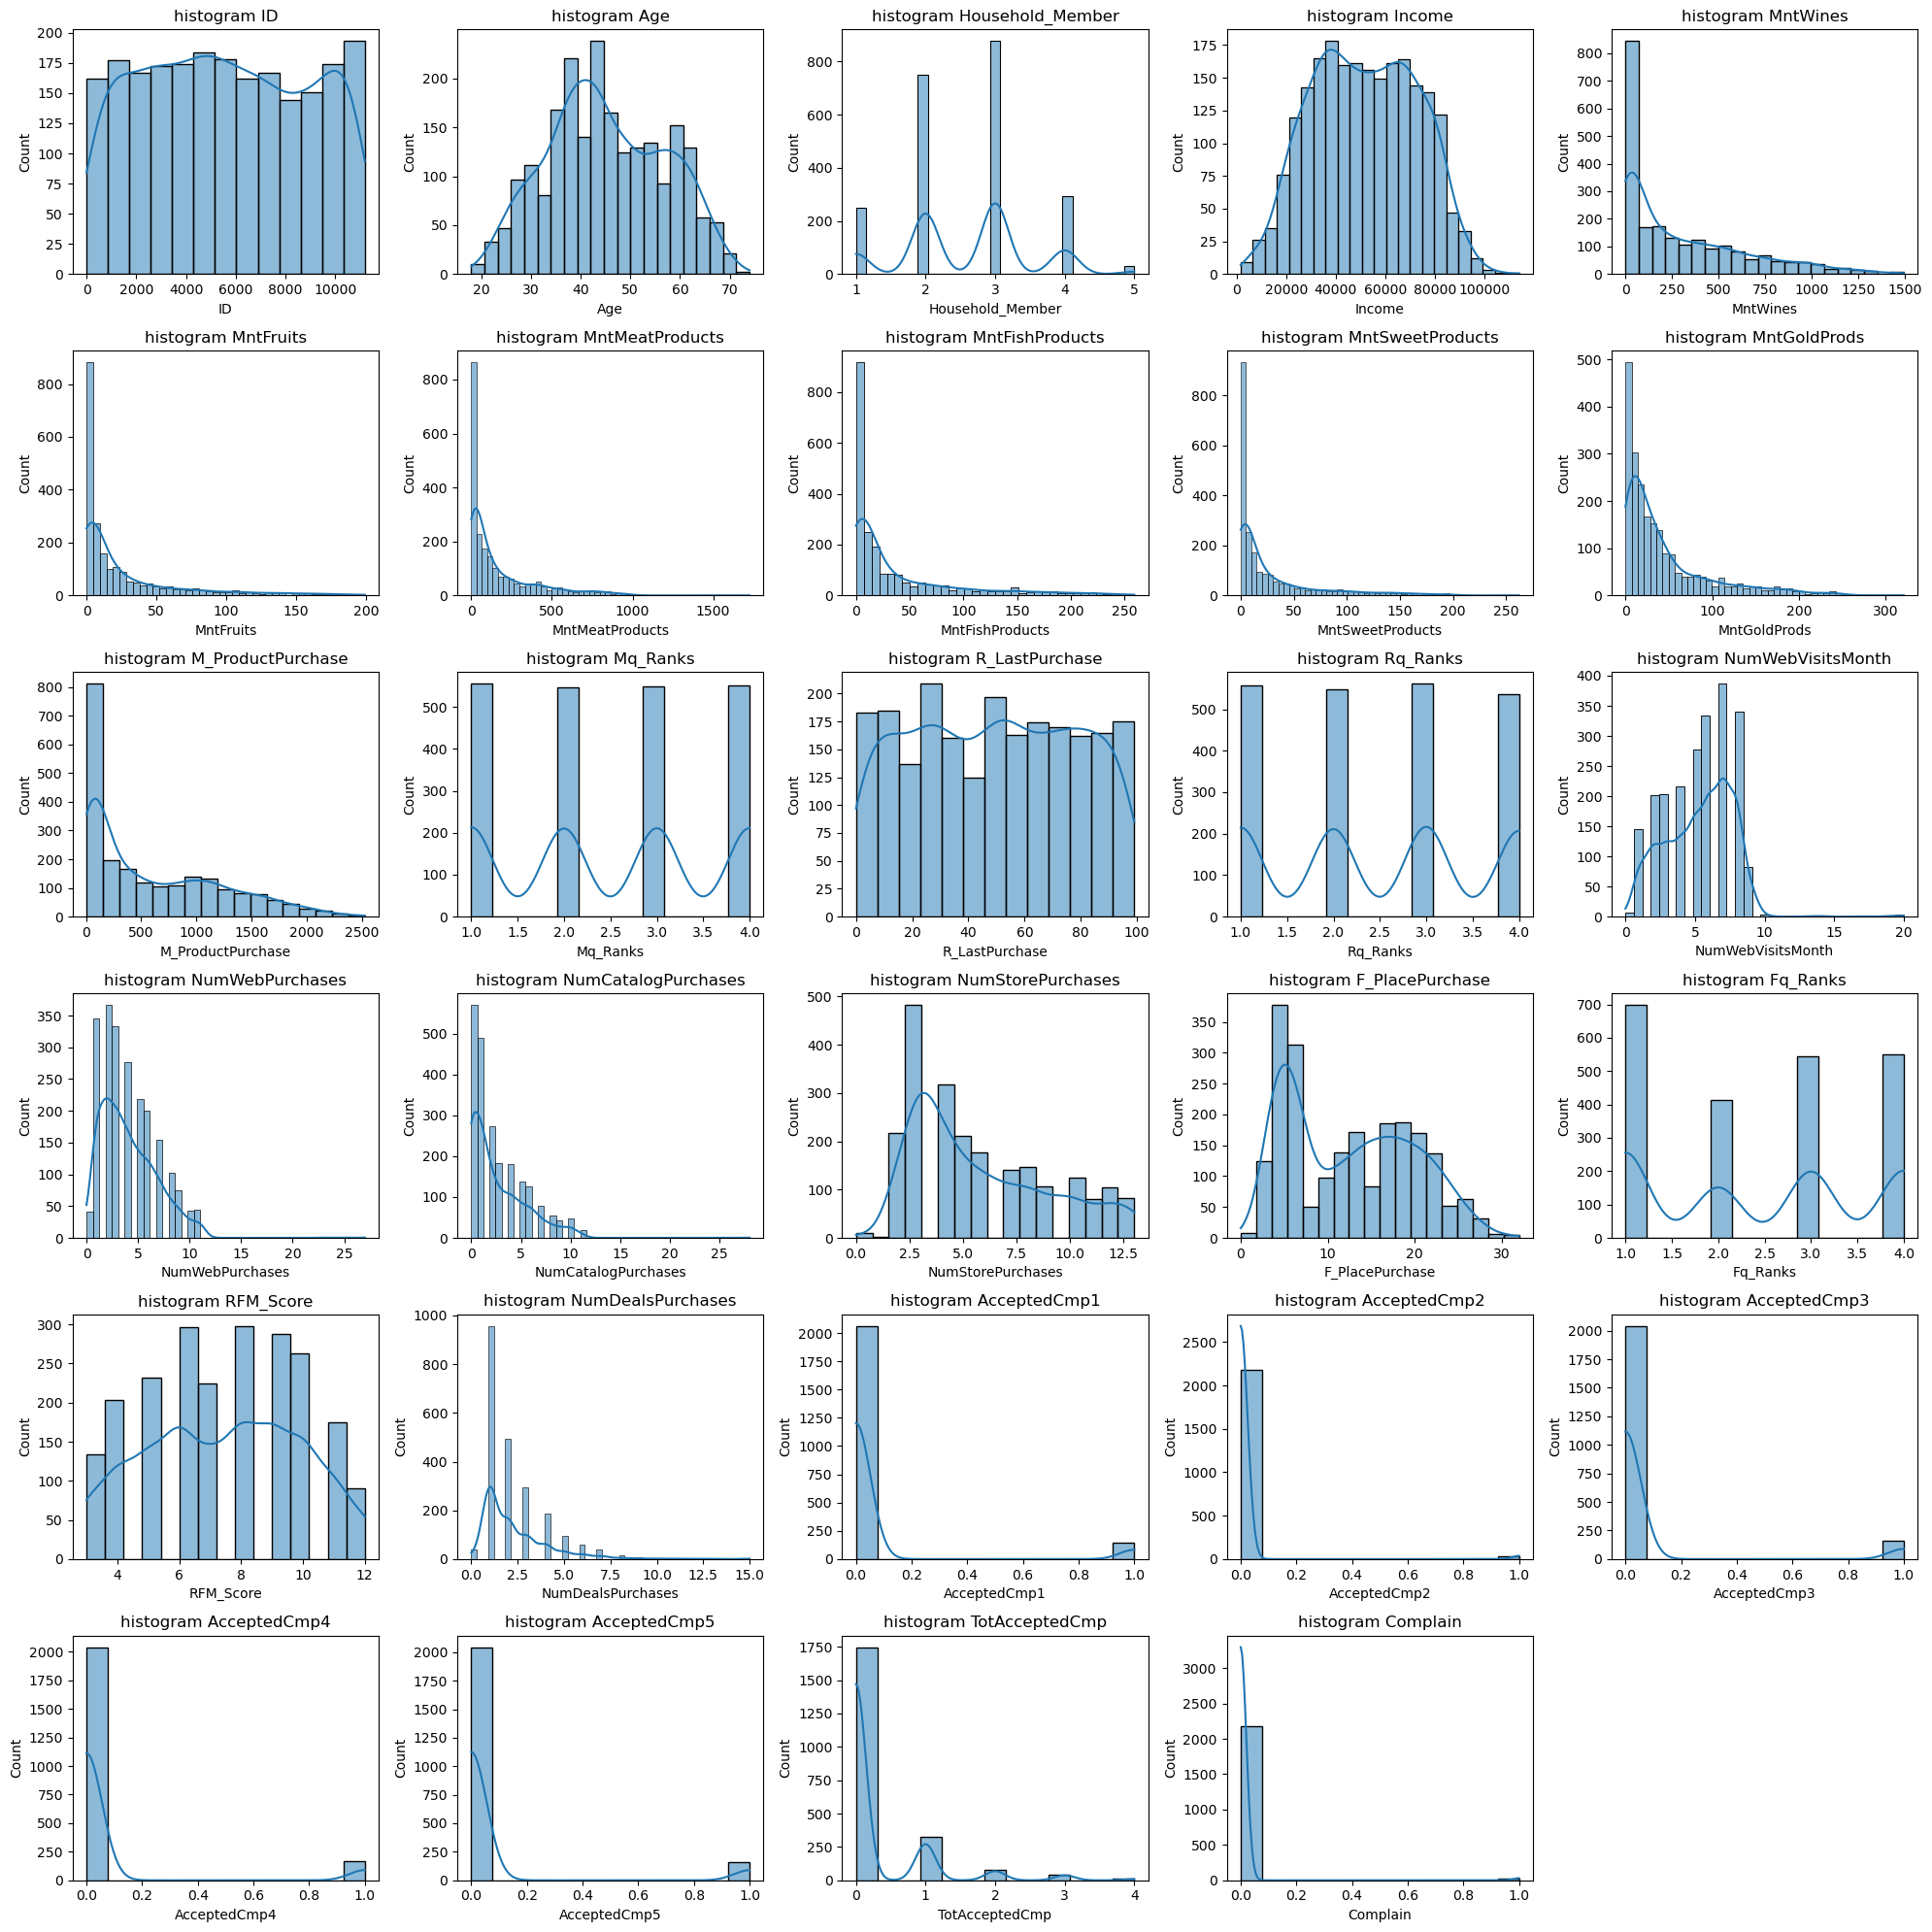

In [17]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(6,5,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12924\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\

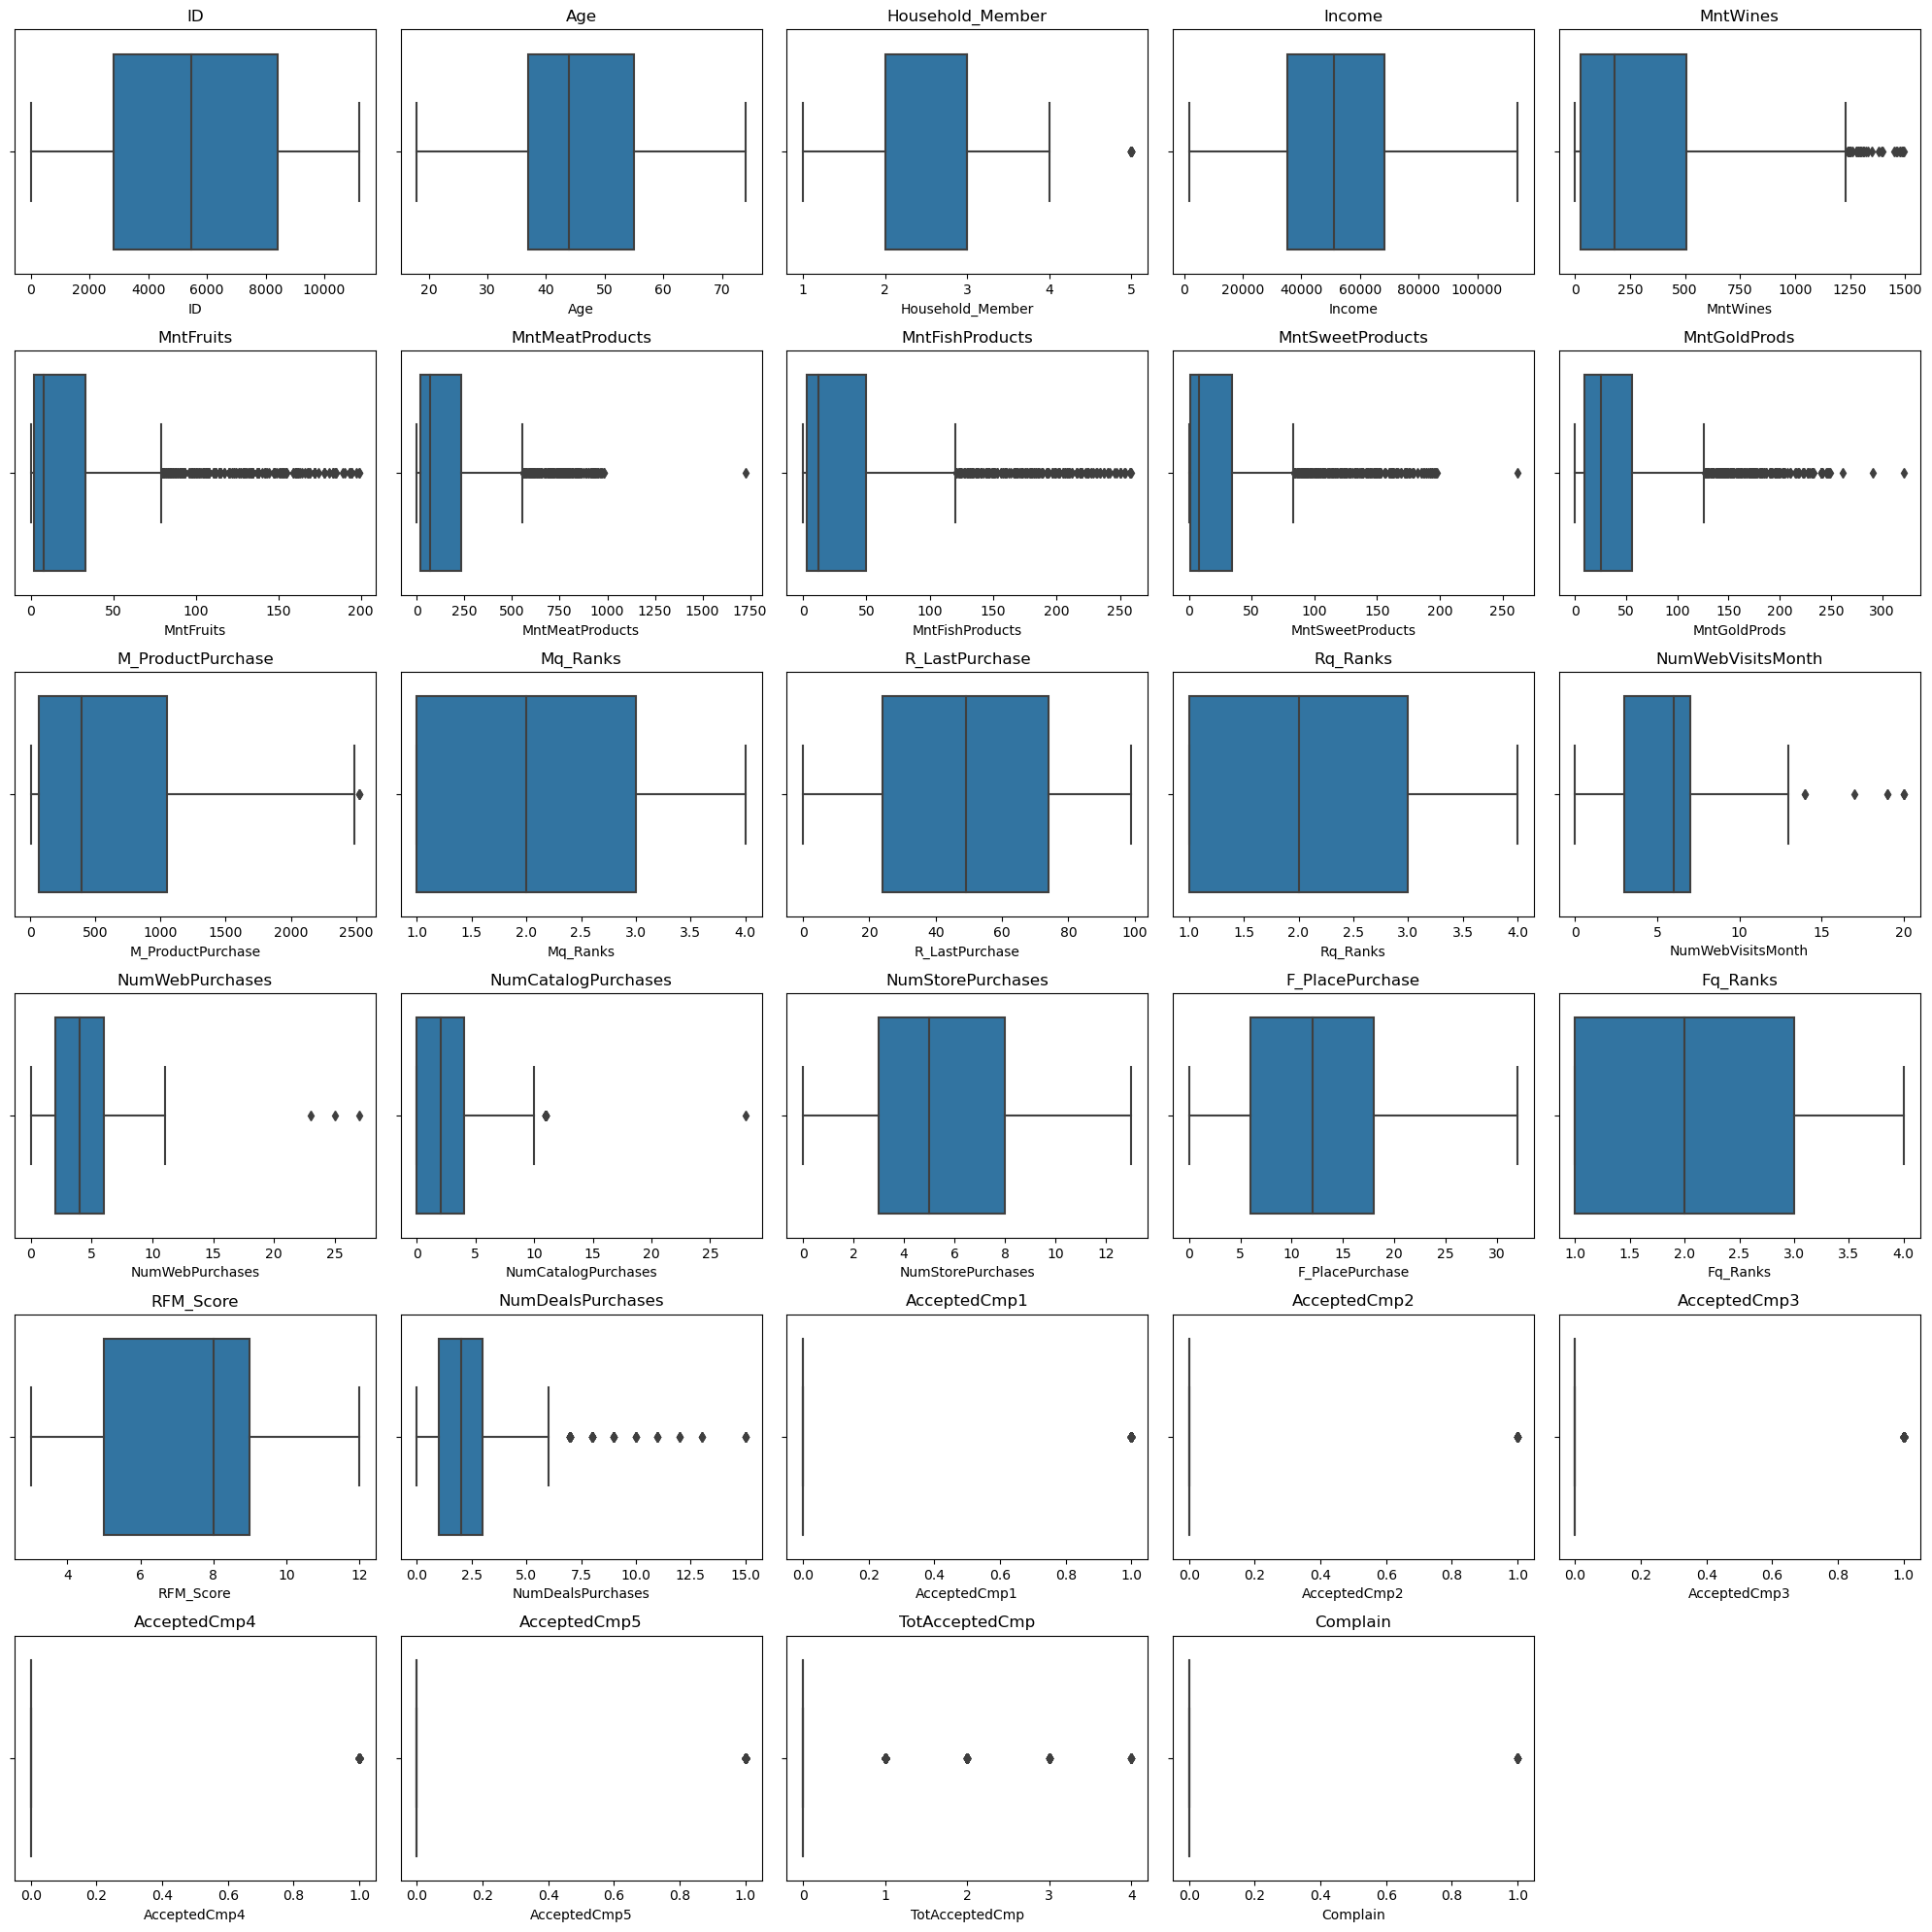

In [24]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(6, 5,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

## Categorical

In [26]:
kategorik = Cdata.select_dtypes(exclude='number')
kategorik

,Education,Income_Class,Dt_Customer,Membership
0,Graduation,Medium,2012-09-04,Bronze Member
1,Graduation,Medium,2014-03-08,Platinum Member
2,Graduation,Medium,2013-08-21,Silver Member
3,Graduation,Low,2014-02-10,Platinum Member
4,PhD,Medium,2014-01-19,Bronze Member
...,...,...,...,...
2200,Graduation,Medium,2013-06-13,Silver Member
2201,PhD,Medium,2014-06-10,Silver Member
2202,Graduation,Medium,2014-01-25,Bronze Member
2203,Master,Medium,2014-01-24,Silver Member


In [27]:
kategorik.describe(include='object')

,Education,Income_Class,Membership
count,2205,2205,2205
unique,3,3,4
top,Graduation,Medium,Silver Member
freq,1167,1324,811


### distribution

C:\Users\User\AppData\Local\Temp\ipykernel_12924\81068134.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\81068134.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_12924\81068134.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk


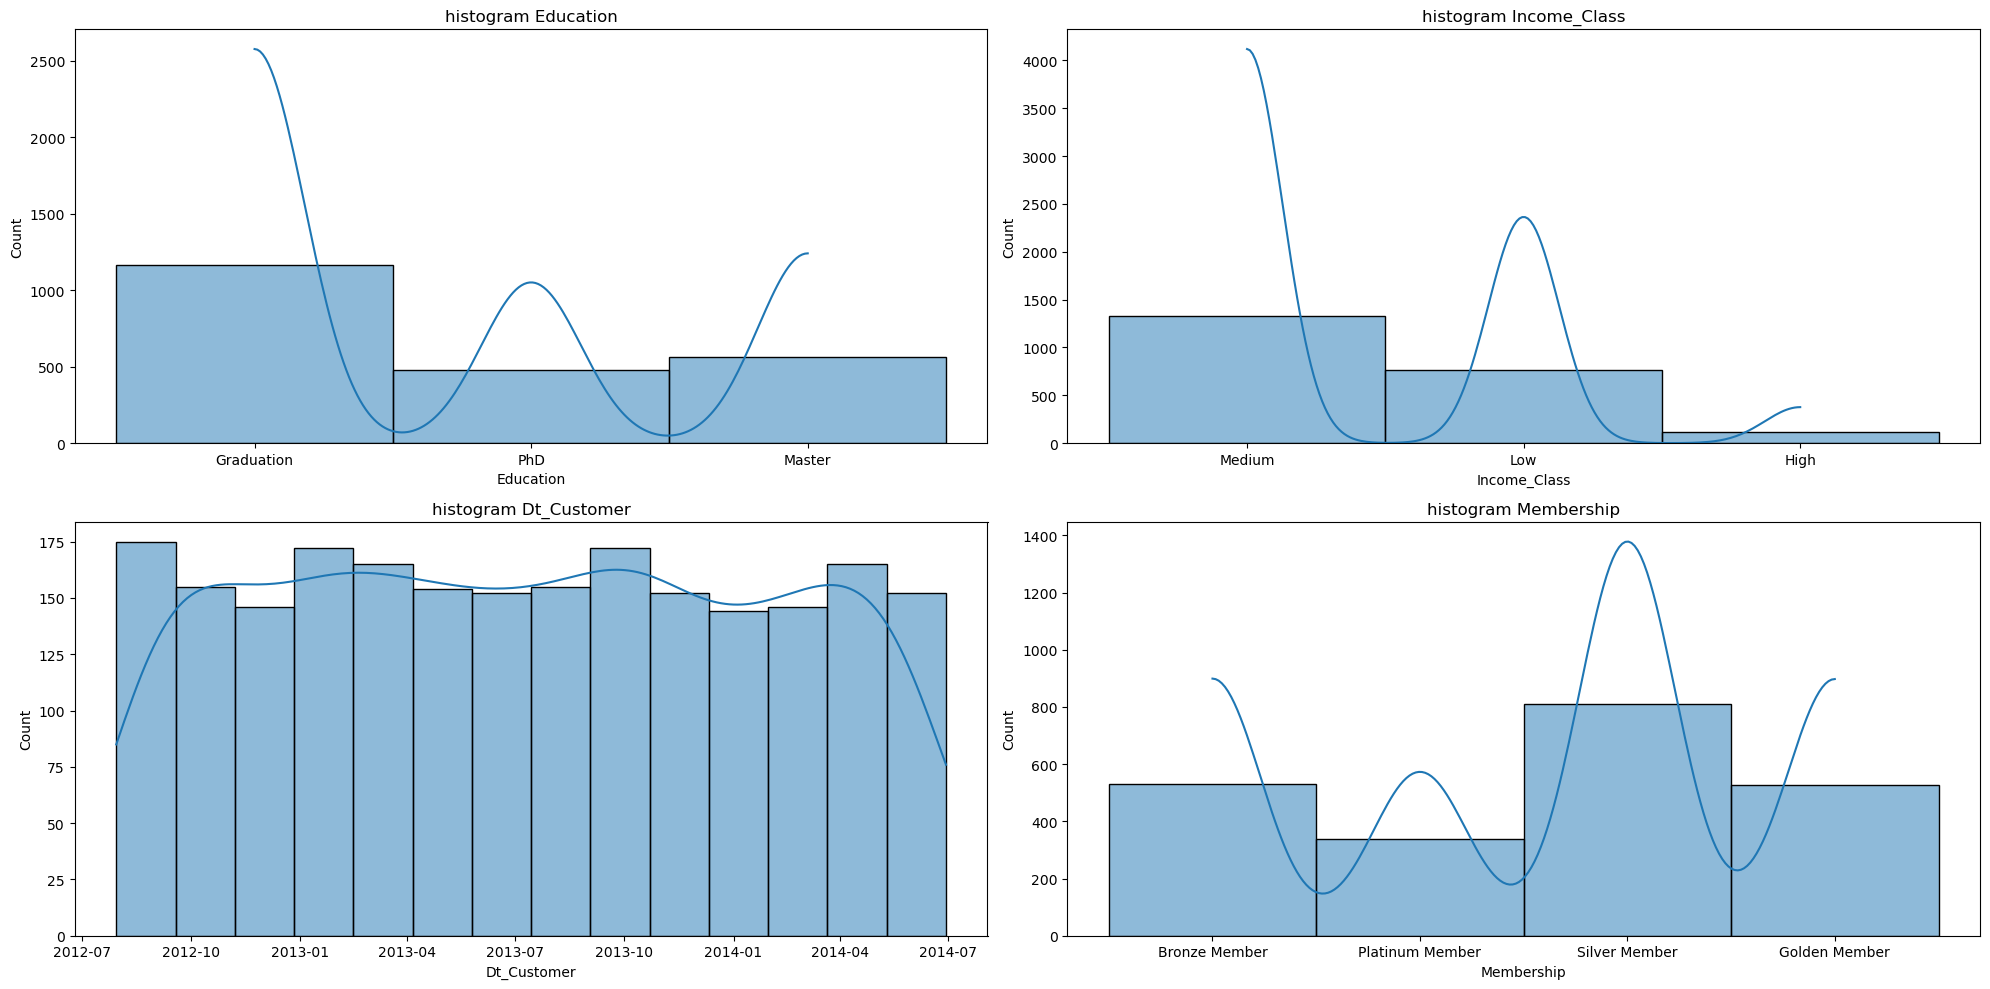

In [37]:
fig = plt.figure(figsize=(20,10)) # horizontal, vertikal

count = 0
for kolom in kategorik.columns:
    count += 1
    plt.subplot(2,2,count)
    sns.histplot(kategorik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

## Correlation

<Axes: >

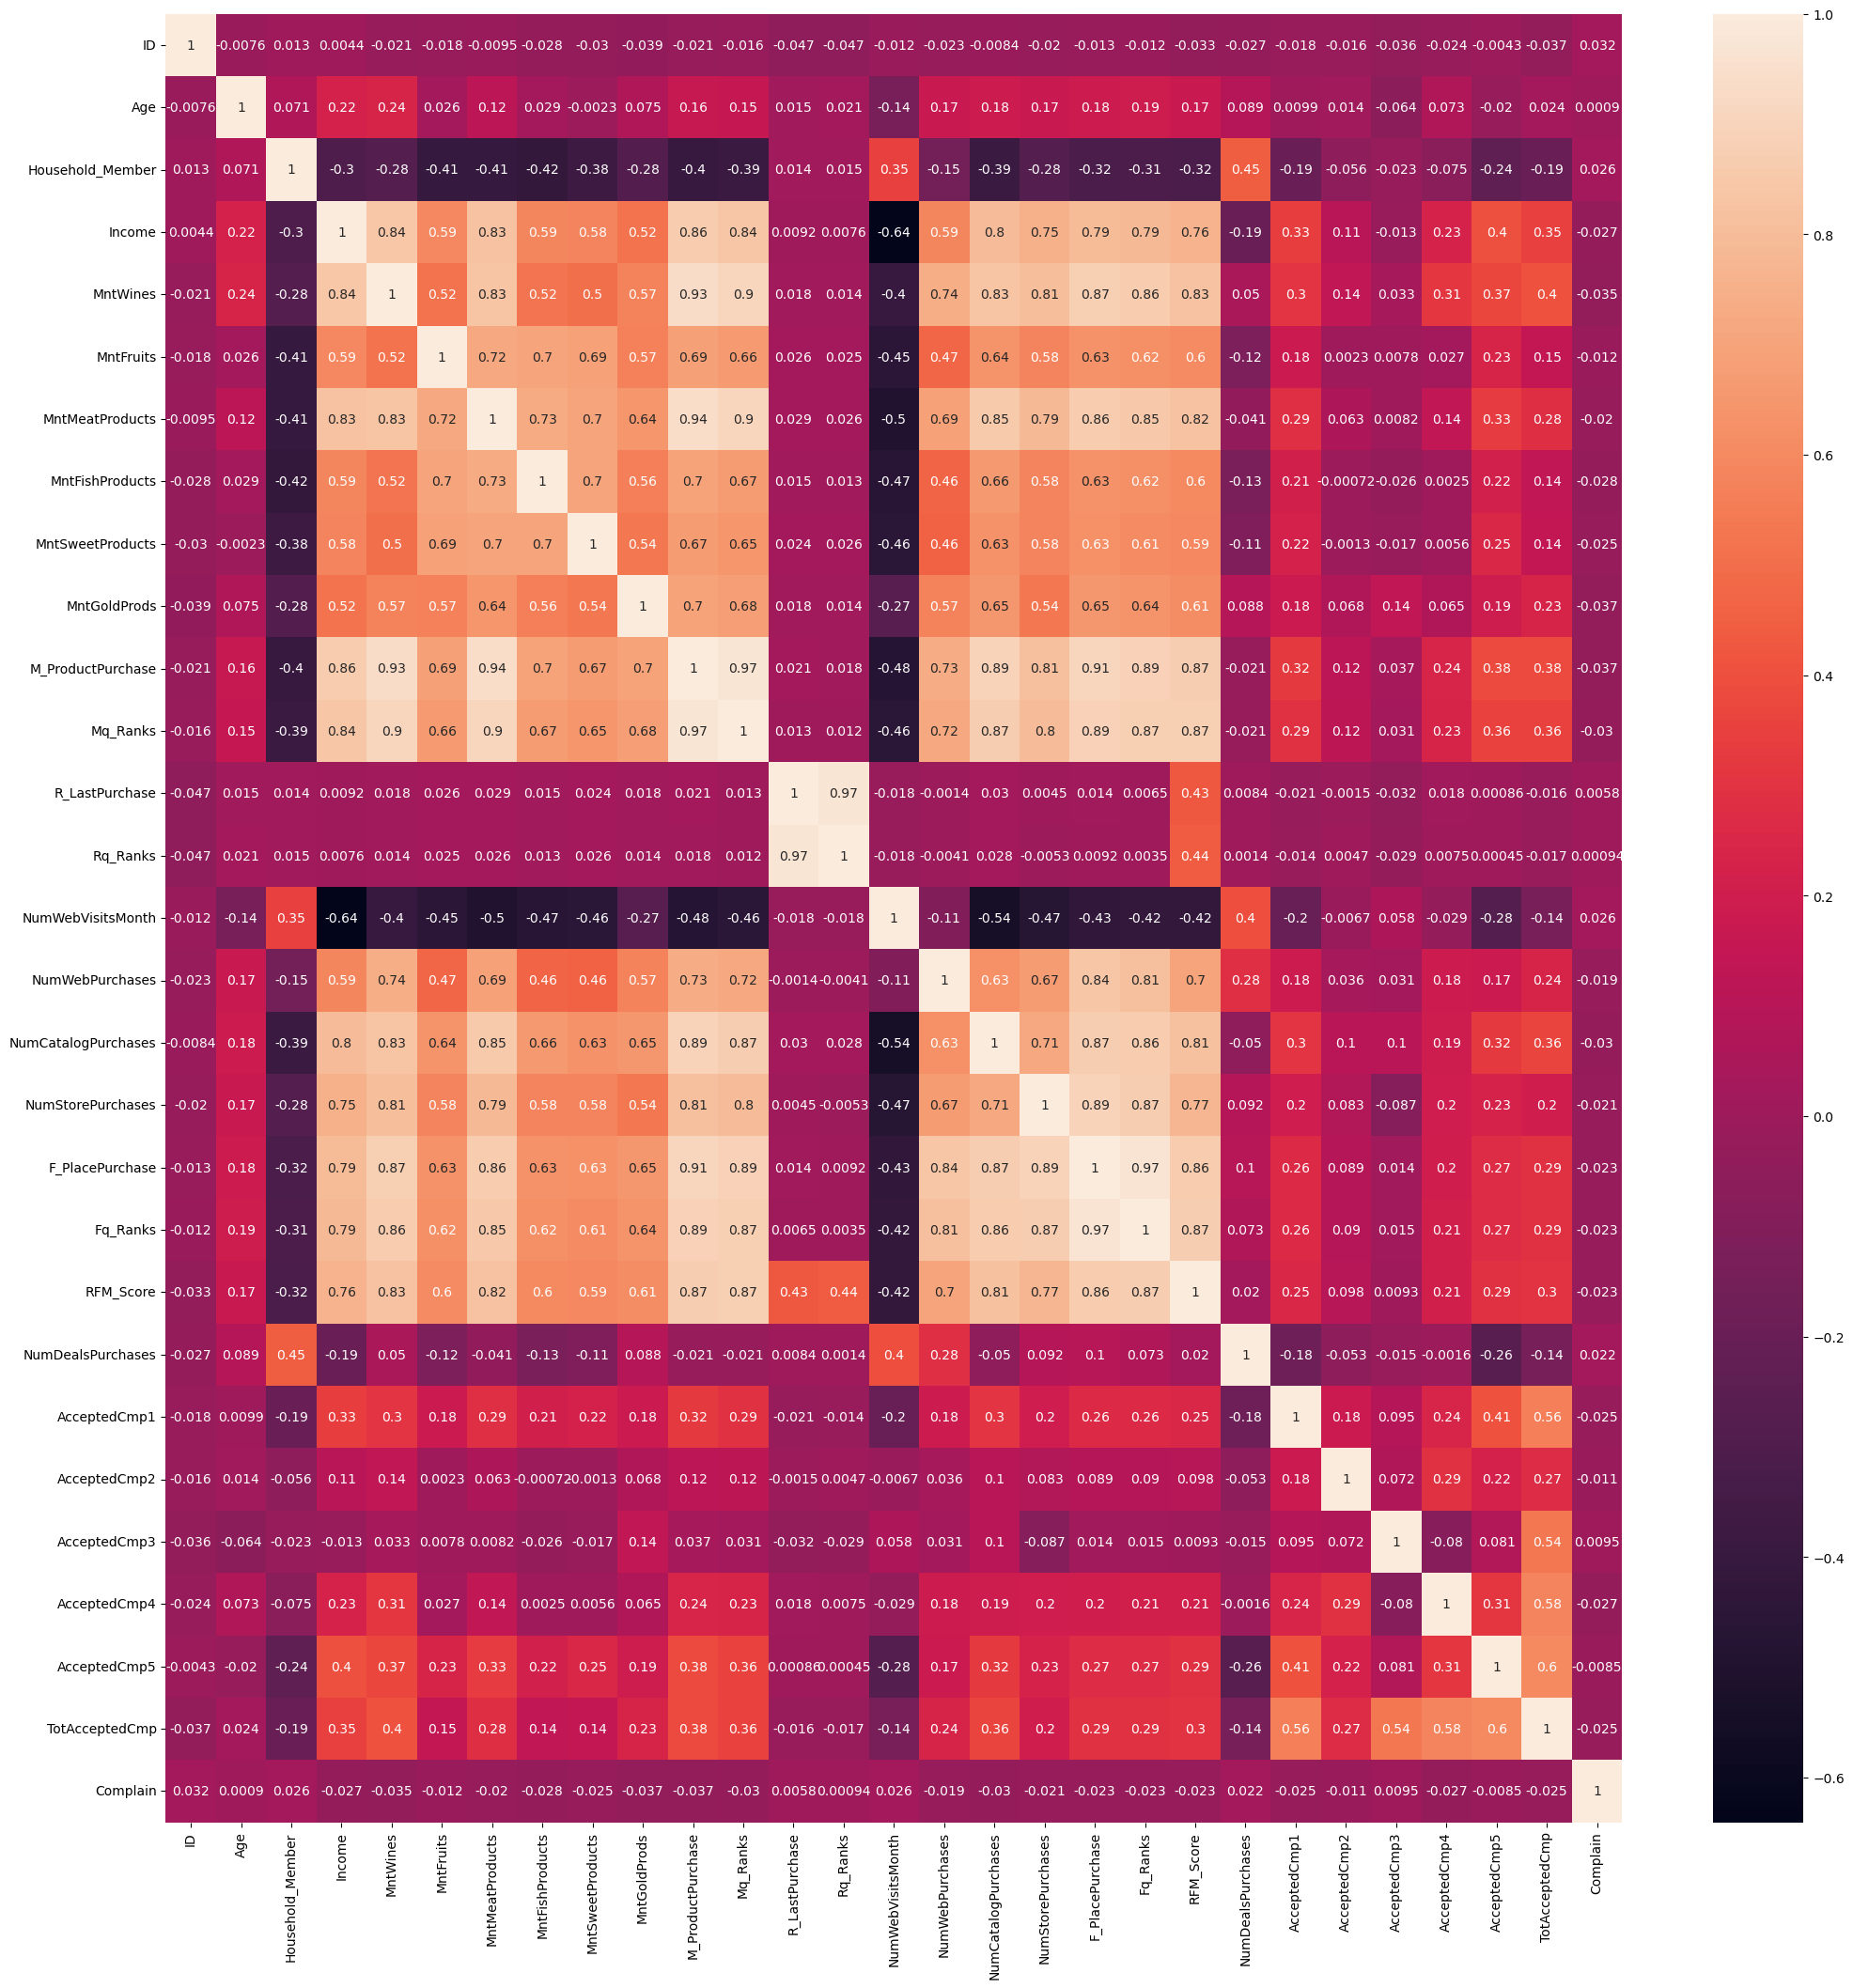

In [40]:
mappings = [
    {'col': 'Education',
    'mapping':{'Graduation': 0, 'Master': 2, 'PhD': 3}},
    {'col': 'Income_Class',
    'mapping':{'Low': 0, 'Medium': 1, 'High': 2}},
    {'col': 'Membership',
    'mapping':{'Bronze': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}}
]

ordinal_encoder = OrdinalEncoder(cols=['Education', 'Age_Group', 'IncomeClass'], mapping=mappings)
df_encoded = ordinal_encoder.fit_transform(df_copy)

df_encoded_1 = df_encoded[['Education', 'Age_Group', 'FamilySize', 'Income', 'IncomeClass', 'T_AmountSpent', 
                           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                           'MntGoldProds', 'NumDealsPurchases', 'T_NPurchase', 'NumWebPurchases','NumCatalogPurchases'
                           ,'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                            'AcceptedCmp1', 'AcceptedCmp2', 'T_AcceptedCmpgn', 'Recency']]

mask = np.triu(np.ones_like(df_encoded_1.corr(), dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded_1.corr(method='spearman'), cmap='Spectral_r', annot=True, fmt='.2f', mask=mask)
plt.title('Correlation Heatmap', fontsize=16, y=1.02, fontweight='bold')
plt.show()